# Table of Contents
 <p><div class="lev1"><a href="#Porting-Torch-l-BFGS-to-TensorFlow-using-Immediate-execution"><span class="toc-item-num">1&nbsp;&nbsp;</span>Porting Torch l-BFGS to TensorFlow using Immediate execution</a></div><div class="lev2"><a href="#Run-Torch7-l-BFGS"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run Torch7 l-BFGS</a></div><div class="lev2"><a href="#Run-TensorFlow-l-BFGS"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run TensorFlow l-BFGS</a></div><div class="lev2"><a href="#Compare-the-results"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compare the results</a></div><div class="lev3"><a href="#Plot-relative-errors-between-Lua-and-TF-l-BFGS"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plot relative errors between Lua and TF l-BFGS</a></div>

# Porting Torch l-BFGS to TensorFlow using Immediate execution

In [2]:
import os, sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Run Torch7 l-BFGS

Take first 100 entries of MNIST 32x32 dataset, optimize for 30 iterations in Torch, using Clement Farabet's lbfgs.lua

This can be ran as follows:
  th mnist_lbfgs_reference.lua
  
You'll see something like this:

0	val	5127.302585093	
1	val	5127.0317186252	
2	val	5125.3903813101	
3	val	5124.9674848028	
4	val	5123.9669985619	
5	val	5123.0994629498	



Save these values into files when generating and plot

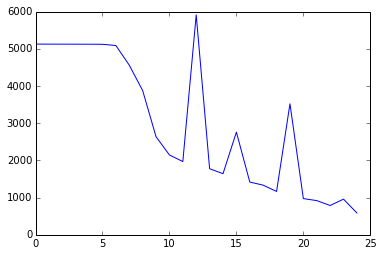

In [39]:
lua_fvals = []
for i in range(1, 26):
    fval_fname = "stepdata.lbfgs/f-"+str(i)
    if not os.path.exists(fval_fname):
        break
    lua_fvals.append(np.loadtxt(fval_fname))
plt.plot(lua_fvals)

## Run TensorFlow l-BFGS

Now do the same using l-BFSG in Immediate mode. It's a line-by-line port of lbfgs.lua, here's comparison
https://docs.google.com/spreadsheets/d/17RwQSIV6E0uXSATec2-Lu_GdhoqEsbabFEWHg1k5wzc/edit?usp=sharing

The whole model can be ran as follows:
    
    python lbfgs_otpimize_reference.py

You'll see something like this

0 val ITensor(5127.30258509, dtype=float64)

1 val ITensor(5127.03171863, dtype=float64)

2 val ITensor(5125.39038131, dtype=float64)

3 val ITensor(5124.9674848, dtype=float64)

4 val ITensor(5123.96699856, dtype=float64)

5 val ITensor(5123.09946295, dtype=float64)


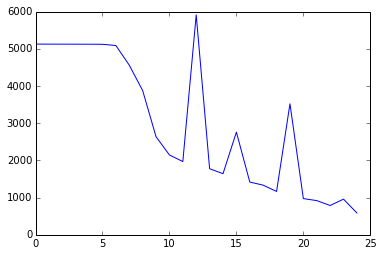

In [40]:
tf_fvals = []
for i in range(1, 26):
    fval_fname = "stepdata.tf/f-"+str(i)+".npy"
    if not os.path.exists(fval_fname):
        break
    tf_fvals.append(np.load(fval_fname))
tf_fvals = np.array(tf_fvals)
plt.plot(tf_fvals)

## Compare the results

We can plot them on the same graph

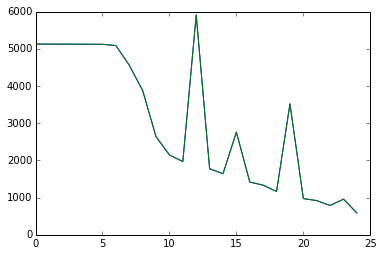

In [43]:
plt.plot(range(25), lua_fvals, range(25), tf_fvals)

### Plot relative errors between Lua and TF l-BFGS

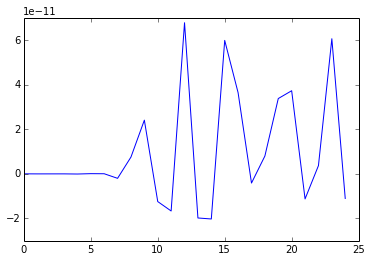

In [44]:
plt.plot((tf_fvals-lua_fvals)/lua_fvals)

In [46]:
np.max((tf_fvals-lua_fvals)/lua_fvals)

6.7704829480660952e-11